# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


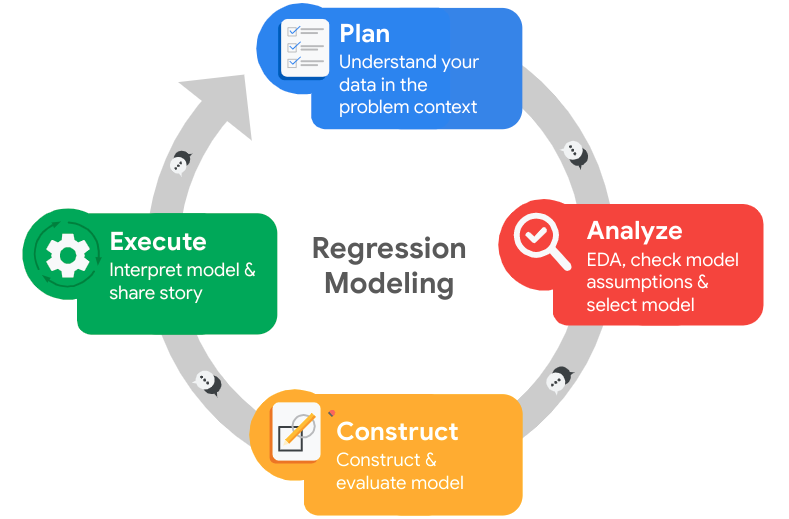

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# data manipulation libraries
import pandas as pd 
import numpy as np 

# for visualizing our data
import matplotlib.pyplot as plt 
import seaborn as sns

# so that we can see all of the columns in dataset 
pd.set_option('display.max_columns',None)

# for modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# metrics and helpful functions 
from sklearn.metrics import accuracy_score,precision_score,f1_score,\
confusion_matrix,ConfusionMatrixDisplay,classification_report

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# lets rename some columns so that modeling goes smoothly
df0 = df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                    'time_spend_company':'tenure',
                    'Work_accident':'work_accident',
                    'Department':'department',})

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

There are 3,008 duplicates in our dataset lets see what those are in more detail within our dataset.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In the output above we see the first 6 occurances of rows that are duplicated. This should make us think, how do we know these are legit entries in our dataset. In other words how likely is it for two employees to write down the same answer for most if not all columns. Based on the fact that these entries may not be legitimate we will drop them from our dataset.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of the new dataframe
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

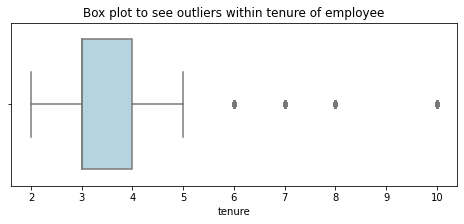

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=[8,3])
sns.boxplot(df1['tenure'],color='lightblue')
plt.title("Box plot to see outliers within tenure of employee")
plt.show()


We see 4 outliers within our dataset so now lets identify our outliers by defining limits on our dataset.

In [12]:
# Determine the number of rows containing outliers
# find the lower quantile of values below the mean
percentile25 = df1['tenure'].quantile(0.25)
# now lets find the upper quantile of values above the mean
percentile75 = df1['tenure'].quantile(0.75)
# the Inner Quantile Range 
IQR = percentile75-percentile25

# defining upper and lower limits to know that outliers are values that are out of these ranges 
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR
# lets display these values to view 
print("Lower Limit:",lower_limit)
print("Upper Limit:",upper_limit)
#now we can use boolean indexing to pinpoint the values that are out of the range we established 
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# how many outliers are in our dataset?
print("Number of Outliers in the variable tenure:",len(outliers))

Lower Limit: 1.5
Upper Limit: 5.5
Number of Outliers in the variable tenure: 824


Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, lets consider whether to remove outliers, based on the type of model I decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)


Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(round(df1['left'].value_counts(normalize=True)*100,1))


0    10000
1     1991
Name: left, dtype: int64
0    83.4
1    16.6
Name: left, dtype: float64


The variable `left` in our dataset tells us whether someone left the company or stayed. <br>
We see that **83.4%** of employees stayed and **16.6%** left the company.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Lets create a stacked boxplot examinging the distribution of the  **`average_monthly_hours`** for the **`number_project`** and comparing the distribution of people who have left the company and the people who have stayed. <br>

We can also show alongside that a histogram to show the the distribution of **`number_project`** for the employees who have stayed and have left.

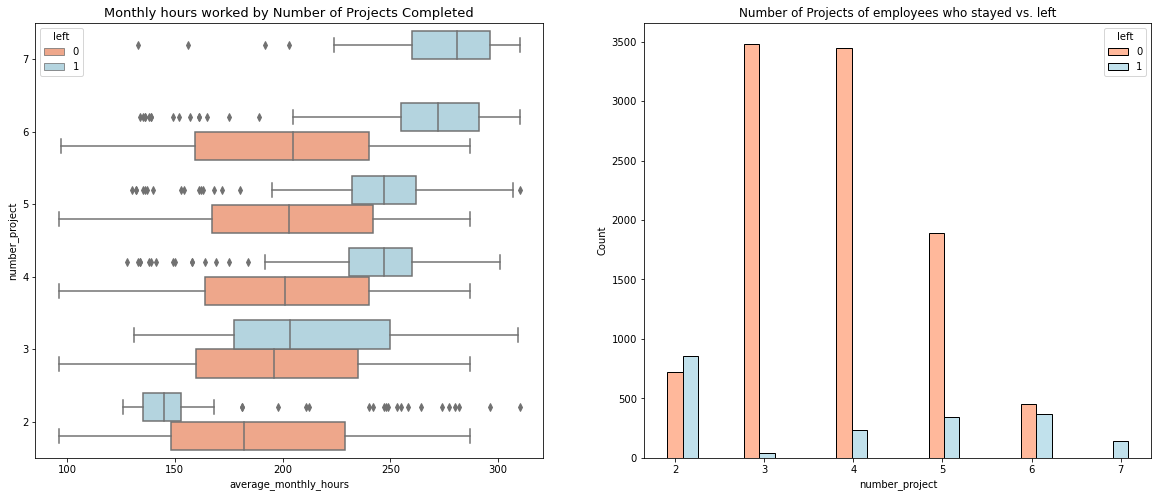

In [14]:
# set the figure along with the axes for the two plots
fig, ax = plt.subplots(1,2,figsize = (20,8))

# creating boxplot distribution for 'average_monthly_hours' for 'number_of_projects' for employees who stayed and who left
custom_palette=["lightsalmon","lightblue"]
sns.boxplot(data=df1,x='average_monthly_hours',y='number_project',hue='left',orient="h",ax=ax[0],palette=custom_palette)
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours worked by Number of Projects Completed',fontsize=13)

# now I want to create histogram of 'number of projects' for those who stayed or left the company
tenure_stayed = df1[df1["left"]==0]["number_project"]
tenure_left = df1[df1["left"]==1]["number_project"]
sns.histplot(data=df1,x="number_project",hue="left",multiple="dodge",shrink=2,ax=ax[1],palette=custom_palette)
ax[1].set_title("Number of Projects of employees who stayed vs. left")

# show the plots
plt.show()

 People who have `left` the company fall into two categories:<br>
- From the graph we see that (1) those who worked less than others with the same number of projects and those who (2) worked way more. For the people in group 1, they could have been fired from the company or they could have already put in their 2 week notice in and were working less hours.
- Now, the people in group 2 they were likely to have quit the company. From the graph they contributed lots of hours and completed a lot of projects compared to others.

From the histogram we can see that everyone who completed seven or more projects left the company and from their inner quantile range we can see those people worked between 255 and 295 hours which is higher than anyone else.<br>

The ideal number of projects completed is 3 to 4 and most of these people stayed in the company rather than left.

Also if we say that the average person works `40 hours a week and there are 52 weeks in a year.`<br>
Usually people `take off at least 2 weeks a year, which would give us 50 working weeks`.<br>
Knowing this we can calculate the average number of hours a month someone works which would be `166.7 hours`.
From knowing this, lets look back at our above chart and it seems that every group besides those who contributed <br>
to two or less projects worked way more hours than the average we calculated. This shows that these employees were overworked.

In [15]:
#Lets double check that people who completed more than 7 projects left the company
stayed = len(df1[(df1["number_project"]==7) & (df1["left"]==0)])
left = len(df1[(df1["number_project"]==7) & (df1["left"]==1)])
print("Stayed:",stayed)
print("Left:",left)

Stayed: 0
Left: 145


Above proves that every employee who completed 7 projects left the company.

Lets create a plot examing the average monthly hours an employee worked against how satisfied they were.


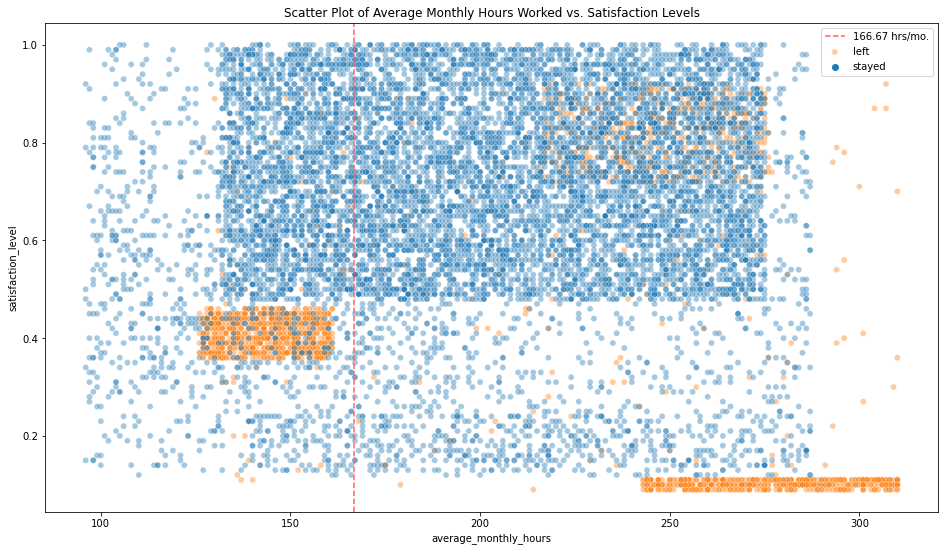

In [16]:
# defining the size of the graph
plt.figure(figsize=(16,9))
# creating the scatterplot with average monthly hours vs. satisfaction levels
sns.scatterplot(data=df1,x='average_monthly_hours',y='satisfaction_level',hue='left',alpha=0.4)
# creating fixed line of industry average hours worked of 166.67 hours
plt.axvline(x=166.67,color='#ff6361',label='166.7 hrs./month',ls='--')
#adding the line as a label to the legend
plt.legend(labels=['166.67 hrs/mo.','left','stayed'])
plt.title("Scatter Plot of Average Monthly Hours Worked vs. Satisfaction Levels")
plt.show()

From this graph we can see that the people who have `left` fall on either side of the average amount of hours an person works a month, which is noted with a red dotted line. <br>

On one side, we see people who work normal hours around 130 to 160 hours a week and these employees have low satisfaction scores between 0.3 and 0.4. This could be due to the fact that they were felt they were underworking compared to their peers which then caused them to have lower satisfaction scores. <br>

On the other side of things we have people who have worked 240 to 310 hours a month! This is extremely high and can be determined as employees being overworked. This could also be the reason all these employees left and had extremely low satisfaction scores. 

Lastly there was a group of people who worked 210 to 280 hours and had satisfaction scores between 0.7 and 0.9. 

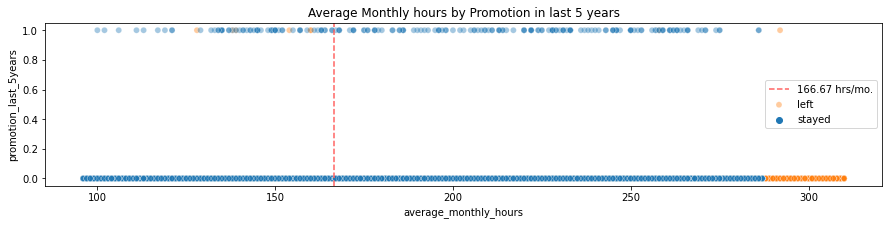

In [17]:
# plot the imagine relationship between 'average monthly hours' and 'promotion in last 5 years'
plt.figure(figsize=(15,3))
sns.scatterplot(data=df1,x='average_monthly_hours',y='promotion_last_5years',hue='left',alpha=0.4)
# creating fixed line of industry average hours worked of 166.67 hours
plt.axvline(x=166.67,color='#ff6361',label='166.7 hrs./month',ls='--')
#adding the line as a label to the legend
plt.legend(labels=['166.67 hrs/mo.','left','stayed'])
plt.title('Average Monthly hours by Promotion in last 5 years')
plt.show()


From this graph, we can see the following:
- There were very few people who were promoted in the last 5 years 
- Everyone who worked extremely long hours left the company
- Not many people who worked long hours were promoted 

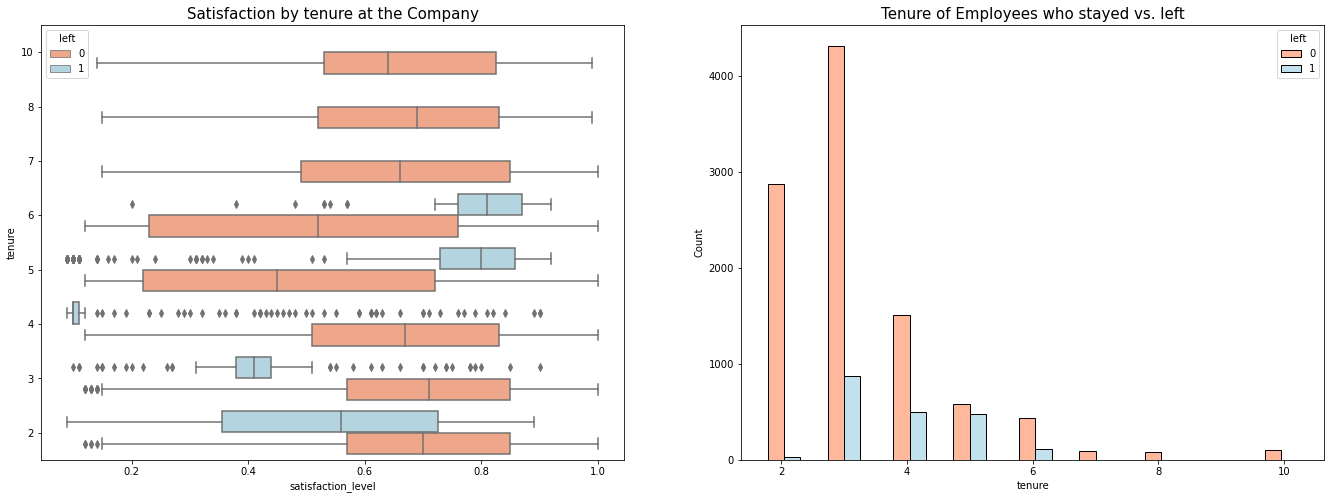

In [18]:
# Create a box plot of satisfaction level by tenure and also a histogram of tenure by whether someone left or stayed at the company
# Set figure and the axes
fig,ax = plt.subplots(1,2,figsize=(23,8))
# lets create the boxplot now 
custom_palette
sns.boxplot(data=df1,x='satisfaction_level',y='tenure',hue='left',orient='h',ax=ax[0],palette=custom_palette)
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure at the Company',fontsize=15)
# creating the second plot of the histogram of tenure
tenure_stayed = df1[df1["left"]==0]["number_project"]
tenure_left = df1[df1["left"]==1]["number_project"]
sns.histplot(data=df1,x='tenure',hue='left',multiple='dodge',shrink=6,ax=ax[1],palette=custom_palette)
ax[1].set_title('Tenure of Employees who stayed vs. left',fontsize=15)
plt.show()


**From the graph we can see two categories employees who have left fall into:**
- Short tenure employees who are dissatisfied with their job and then we have mid tenure employees who are very satisfied with their job.
- The longest tenure employees did not leave. The satisfaction levels of these employees are the same as newer employees who also did not leave. 
- It seems that 4 year employees have a extremely low satisfaction score compared to others. This would be something worth investigating as to if at the 4-year mark there was changes to employees that made them leave and have a satisfaction level so low. 
- Also it seems that long term tenure employee count is very low, these could be higher earners or higher ranked employees. 

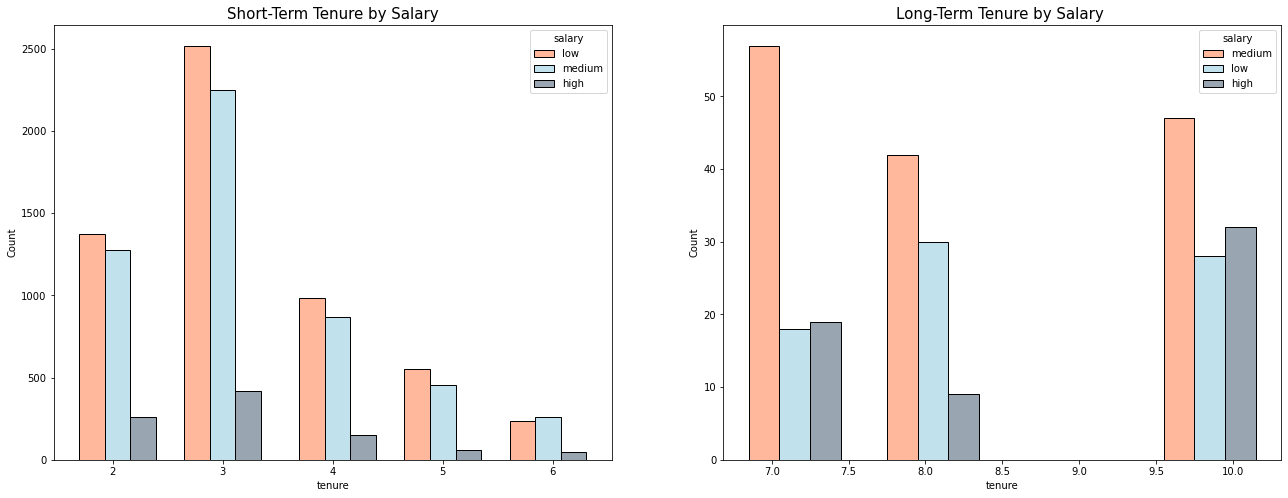

In [19]:

# create histograms to compare salary based on tenure of the employee
fig,ax=plt.subplots(1,2,figsize=(22,8))
custom_palette1 = ["lightsalmon","lightblue","lightslategrey"]
# lets create a variable to define short term employees 
tenure_short = df1[df1["tenure"]<7]
# also lets create another variable to define long term employees 
tenure_long = df1[df1["tenure"]>6]

#short term histogram
sns.histplot(data=tenure_short,x="tenure",hue="salary",multiple='dodge',shrink=8,ax=ax[0],palette=custom_palette1)
ax[0].set_title("Short-Term Tenure by Salary",fontsize='15')
#long term histogram
sns.histplot(data=tenure_long,x="tenure",hue="salary",multiple="dodge",shrink=2,ax=ax[1],palette=custom_palette1)
ax[1].set_title("Long-Term Tenure by Salary ",fontsize="15")
plt.show()

From this plot, we can derive that higher tenure employees did not necessarily have higher salary levels. The high salary levels were not dissproportionate to the shorter tenure employees on the left.

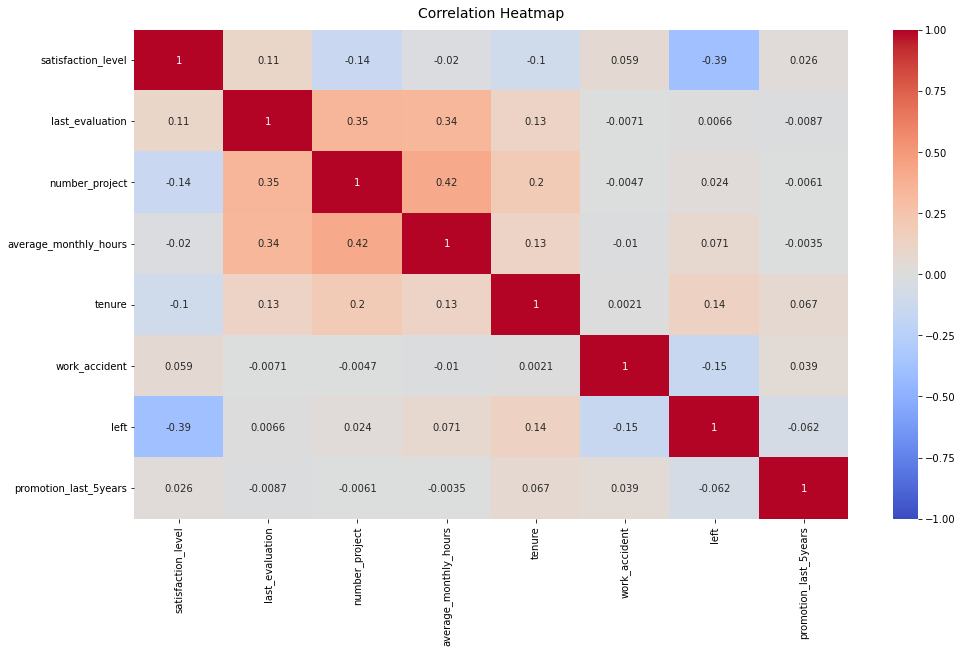

In [20]:
# Lastly lets check if there are any correlations in the dataset with a correlation heatmap
# plot the size
plt.figure(figsize=(16,9))
# plot the heatmap
correlation_heatmap = sns.heatmap(df0.corr(),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("coolwarm",as_cmap=True))
# set the title
correlation_heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':14}, pad=12)
plt.show()

**From the correlation plot we can see the following:**
- `Evaluation Score` , `Number of Projects`, and `Average Monthly Hours` all have positive correlation with eachother. 
- Also, if an employee `left` the company or not had a negative correlation with their `satisfaction level`.

## Exploratory Data Analysis Insights
- From our EDA process we have discovered that many people are leaving the company due to poor managment skills!
- Some correlations that were found to people leaving were **working longer hours**, **completing more projects**, and having a **low satisfaction score**.
- Many of the employees in the company have worked far above the average working hours for a person and this can lead to these people being burnt out and lead to them having left.
- Also, seems that if a person stays longer than 5 to 6 years they tend to stay.

# PACE: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We want to predict whether an employee leaves the company, which is a categorical variable outcome. This would meant we are dealing with a classifaction problem. This would be considered binary classification and our outcome variable `left` can be 0 (an employee stayed) or 1(an employee left).

### Identify the types of models most appropriate for this task.

You can use a few different modeling approaches for this task, but we are going to build a Logistic Regression model since we are predicting an output which is a categorical variable.

### Modeling

### Logistic Regression 
Before we split the data, we want to encode the non-numeric variables, in our case we have two variables: `salary`&`department`.
Our `salary` variable is categorical, but it has hierachy so we want to keep that consistent which is why we might want to have the levels go from 0-2. Our `department` variable on the other hand has is categorical so we can just dummy encode it.

In [21]:
# encode the data in a variable
df_enc = df1.copy()
# now we need to code our categorical variables as numeric, specifically 'salary'&'department'
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low','medium','high'])
    .cat.codes
)

# now we can dummy endcode the 'department variable'
df_enc = pd.get_dummies(df_enc,drop_first=False)

# lets see if those changes were made in our dataset
df_enc.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


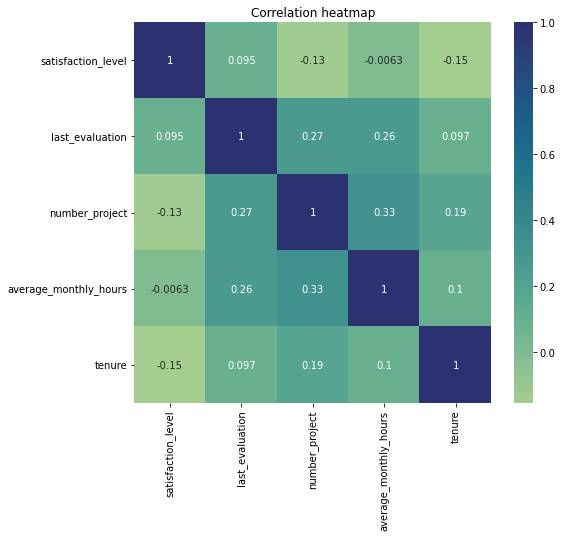

In [22]:
# creating a heatmap to see how correlated our variables within our dataset are
plt.figure(figsize=(8,7))
sns.heatmap(df_enc[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']].corr(),
            annot=True,cmap='crest')
plt.title("Correlation heatmap")
plt.show()

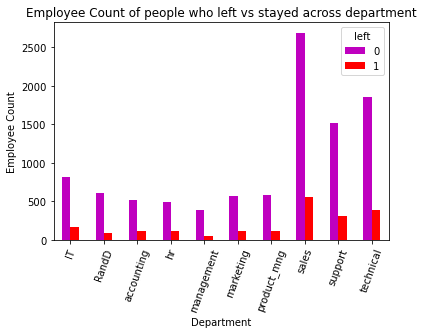

In [23]:
# lets create a plot of 'department' with employees who have'left' or not
pd.crosstab(df1['department'],df1['left']).plot(kind='bar',color='mr')
plt.xticks(rotation=70)
plt.title('Employee Count of people who left vs stayed across department')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.show()

In [24]:
# Since we are building a logistic regression model, lets remove our outliers
df_logreg = df_enc[(df_enc["tenure"]>=lower_limit) & (df_enc["tenure"]<=upper_limit)]
# lets see the first few rows of the new dataframe
df_logreg.head(4)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# isolating our outcome variable 
y = df_logreg["left"]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [26]:
# Now lets isolate our variables or features to use for our model
# drop the outcome variable 'left' from our features dataset
x = df_logreg.drop("left",axis=1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
# now lets train test split our data
# also since our data is unbalanced we define 'stratify=y' so it maintains sampling in our train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)

In [28]:
# lets build our classifier and then fit our model to the training data
clf = LogisticRegression(random_state=42,max_iter=500).fit(X_train,Y_train)

In [29]:
# lets get predictions using the model on the test set
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

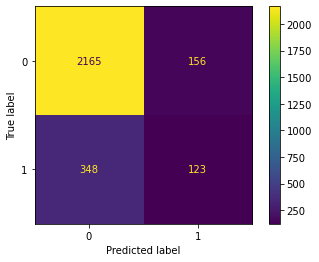

In [30]:
# now that we have our predictions lets create a confusion matrix 
cm = confusion_matrix(Y_test,y_pred,labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(values_format='d')
plt.show()

#### Confusion Matrix Evaluation 
 - **The upper left quadrant**: Displays the *True Negatives*, the amount of employees who did not leave the company which the model accurately predicted did not leave.
 - **The bottom left quadrant**: Displays the *False Negatives*, the amount of employees who left the company which the model inaccurately predicted did not leave the company
 - **The upper right quadrant**: Displays the *False Positives*, the amount of employees who did not leave the company which the model inaccurately predicted did leave. 
 - **The bottom right quadrant**: Displays the *True Positives*, the amount of employees who did leave the company which the model accurately left the company. 
 
 *IF we had a perfect model, we would have all True Positives  and True Negatives , while zero False Positives and False Negatives.*

In [31]:
# lets see the class imbalance as in a binary classification task it will determine how you evaluate the model
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The split is approximately and 83%-17% percent split. This is not perfectly balanced, but it is not overly unbalanced. If this was overly unbalanced, we might want to resample the dataset to make sure it is more balanced. For our current data, we just keep it how it is and continue evaluating our model.

In [32]:
# lets create a classification report for our logistic regression model 
target_names = ["Predicted Would Not Leave","Predicted Would Leave"]
print(classification_report(Y_test,y_pred,target_names=target_names))

                           precision    recall  f1-score   support

Predicted Would Not Leave       0.86      0.93      0.90      2321
    Predicted Would Leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Our classification report above shows that model achieved a precison score of 86%, a recall score of 93%, f1-score of 90%, and accurary of 82%. But, if it is more important to predict employees who are leaving the company then the scores are lower compared to predicting that they will not leave. <br>
We also see above that 

In [33]:
# lets see feature importance in our dataset
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, Y_train)

print(f"model score on training data: {model.score(X_train, Y_train)}")
print(f"model score on testing data: {model.score(X_test, Y_test)}")

model score on training data: 0.9827291584318827
model score on testing data: 0.9044551958440932


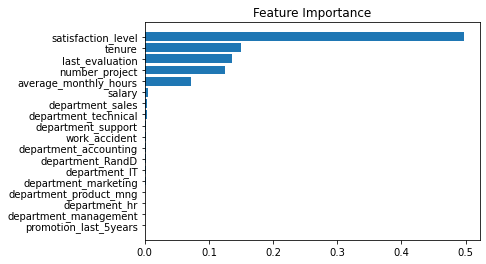

In [34]:
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
ax.set_title("Feature Importance")
plt.show()

From the feature importance chart above, the variables that are of most help to determine whether an employee leaves or not are `satisfaction_level`, `tenure`, `last_evaluation`, `number_project`, and `average_monthly_hours`.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
Our Logistic Regression Model achieved a precision of 86%, recall score of 93%, and f1-score of 90%.

### Conclusion, Recommendations, Next Steps
The model results confirm that the employees at our company are overworked.

**In order to retain employees, the following can be implemented:**
- Cap the number of projects  that employees work on so that burn out does not occur.
- 4 year employees seem to have extremely low satisfaction scores, we should think about promoting employees who have been at the company for 4 years or longer. If this is not an option then further research can be done to understand why employees at 4 years are so dissatisfied.
- Most employees at this company had been overworked, so either provide them a reward for their time and effort and do not require them to work such extensive hours. 
- Consider informing employees on overtime pay policies if they are not familiar with them. 
- A scale should be put in place for evaluation scores and not explicitiy given to those who work 200+ hours per month!

#### Next Steps
It would be nice to see how the models predictions change when the variable `last_evaluation` is removed from the dataset. Sometimes evaluations of employees can not be done very frequently which could make it useful to predict employee retention without this variable. Also, an employee evaluation score as well as satisfaction score could cause an employee to leave or not. It would be nice to pivot it out and see if we can predict employee performance score.